<a href="https://colab.research.google.com/github/Likelipop/DQL_Trading_based/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
* [5.Evaluate Algorithms and Models](#5)
    * [5.1. Train Test Split](#5.1)
    * [5.2. Implementation steps and modules](#5.2)
    * [5.3. Agent Script](#5.3)
    * [5.4. Helper Function](#5.4)
    * [5.5. Training Set](#5.5)       

* [6.Test Set](#6)           

<a id='0'></a>
# 1. Problem Definition

<a id='2'></a>
# 2. Tải thư viện và Dữ liệu

<a id='2.1'></a>
## 2.1 Tải thư viện

In [41]:
!pip install vnstock
!pip install cufflinks
!pip install plotly

In [42]:
import vnstock as vs
from vnstock import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id='2.2'></a>
## 2.2 Tải dữ liệu

In [43]:
stock_VNM = Vnstock().stock(symbol='VNM', source='VCI')
stock_QNS = Vnstock().stock(symbol='QNS', source='VCI')
stock_MCM = Vnstock().stock(symbol='MCM', source='VCI')

2025-01-11 09:00:05 - vnstock.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2025-01-11 09:00:08 - vnstock.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2025-01-11 09:00:12 - vnstock.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [44]:
df_VNM = stock_VNM.quote.history(start='2019-01-01', end='2025-01-01', interval='1D')
df_QNS = stock_QNS.quote.history(start='2019-01-01', end='2025-01-01', interval='1D')
df_MCM = stock_MCM.quote.history(start='2019-01-01', end='2025-01-01', interval='1D')


In [45]:
df_MCM.set_index('time', inplace=True)
df_VNM.set_index('time', inplace=True)
df_QNS.set_index('time', inplace=True)

In [46]:
list_milks = ['VNM', 'QNS', 'MCM']
milk_stocks = pd.concat([df_VNM,df_QNS,df_MCM],
                        axis=1,
                        keys=list_milks)
milk_stocks.columns.names = ['Milk Name', 'Stock Info']

In [47]:
print(f"VNM: {df_VNM.shape}    MCM: {df_MCM.shape}    QNS: {df_QNS.shape}")

VNM: (1501, 5)    MCM: (1002, 5)    QNS: (1501, 5)


In [48]:
df_VNM.describe()

,open,high,low,close,volume
count,1501.000000,1501.000000,1501.000000,1501.000000,1.501000e+03
mean,73.118314,73.758314,72.473511,73.060986,2.336367e+06
std,8.645751,8.658382,8.579413,8.640012,1.688750e+06
min,55.370000,57.420000,55.370000,55.370000,2.717300e+05
25%,65.590000,66.080000,64.930000,65.490000,1.154000e+06
50%,71.710000,72.360000,70.990000,71.660000,2.033574e+06
75%,79.360000,79.870000,78.710000,79.240000,3.001858e+06
max,96.060000,97.300000,95.150000,96.670000,2.116741e+07


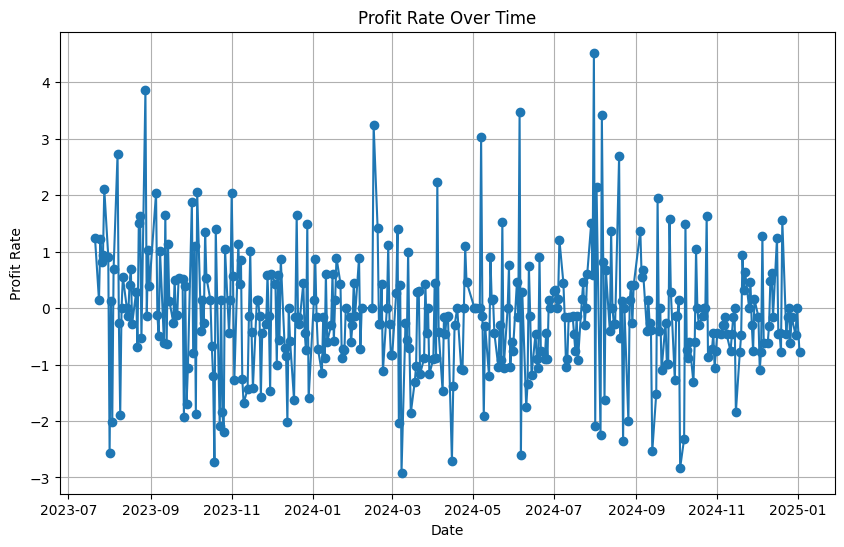

In [57]:
#Tinh ti suat loi nhuan ((close-open)/open)*100
df_VNM['profit rate'] = ((df_VNM['close']-df_VNM['open'])/df_VNM['open'])*100

# Giả sử df_VNM có cột 'date' là chỉ số thời gian và 'profit rate' là tỉ suất lợi nhuận
plt.figure(figsize=(10, 6))
plt.plot(df_VNM.index[-365:], df_VNM['profit rate'][-365:], marker='o')
plt.title('Profit Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Profit Rate')
plt.grid(True)
plt.show()

#ti suat loi nhuan cang cao thi co phieu cang noi bat, kha nang sinh loi cang nhieu

In [54]:
value_milks = pd.DataFrame()
for name in list_milks:
  value_milks[name+' closed'] = milk_stocks[name]['close'].pct_change()*100
value_milks

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.


,VNM closed,QNS closed,MCM closed
time,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.885292,0.225124,NaN
2019-01-04,1.697078,-0.224618,NaN
2019-01-07,4.805521,-1.215669,NaN
2019-01-08,-0.766192,-2.643573,NaN
...,...,...,...
2024-12-26,-0.156495,1.374228,-0.286123
2024-12-27,0.000000,0.196464,0.430416
2024-12-30,-0.783699,-0.784314,-0.285714


<a id='3'></a>
# 3. Khai phá dữ liệu

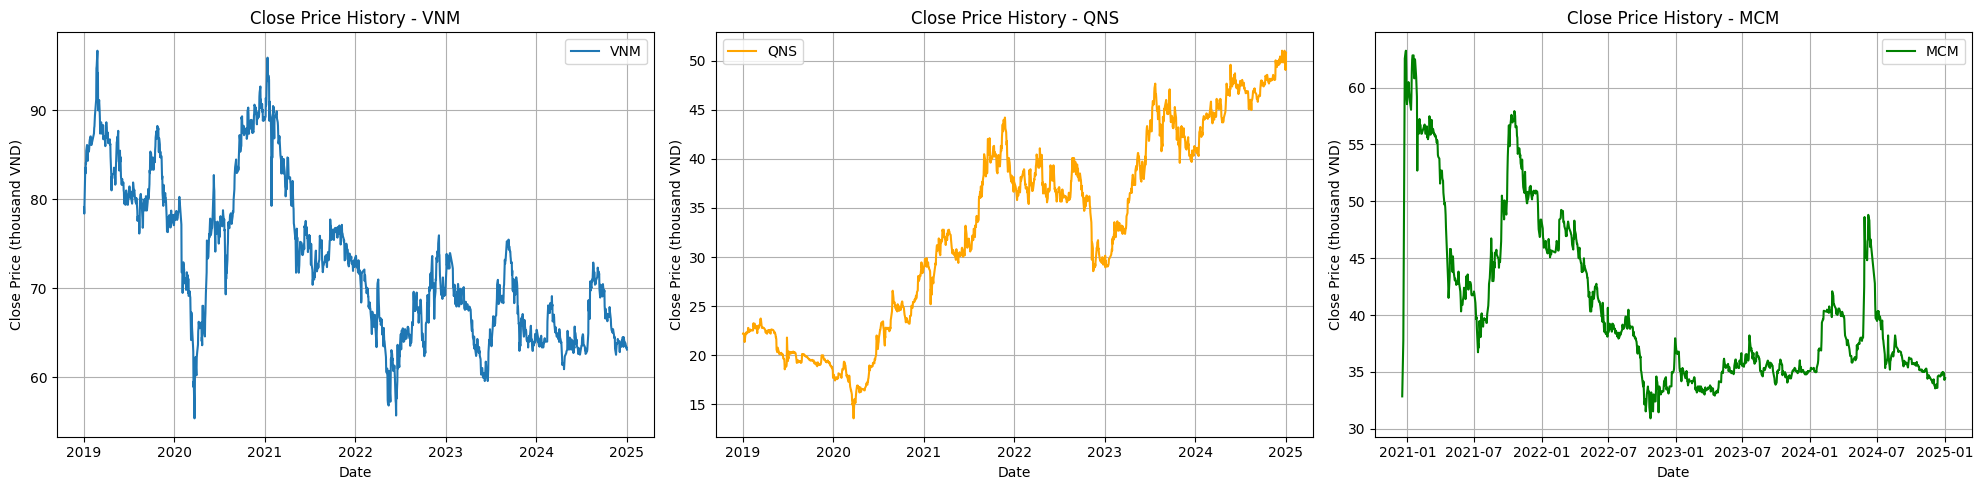

In [68]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Biểu đồ cho df_VNM
axs[0].plot(df_VNM.index, df_VNM['close'], label='VNM')
axs[0].set_title("Close Price History - VNM")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close Price (thousand VND)')
axs[0].grid(True)
axs[0].legend()

# Biểu đồ cho df_QNS
axs[1].plot(df_QNS.index, df_QNS['close'], label='QNS', color='orange')
axs[1].set_title("Close Price History - QNS")
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Close Price (thousand VND)')
axs[1].grid(True)
axs[1].legend()

# Biểu đồ cho df_MCM
axs[2].plot(df_MCM.index, df_MCM['close'], label='MCM', color='green')
axs[2].set_title("Close Price History - MCM")
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Close Price (thousand VND)')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()


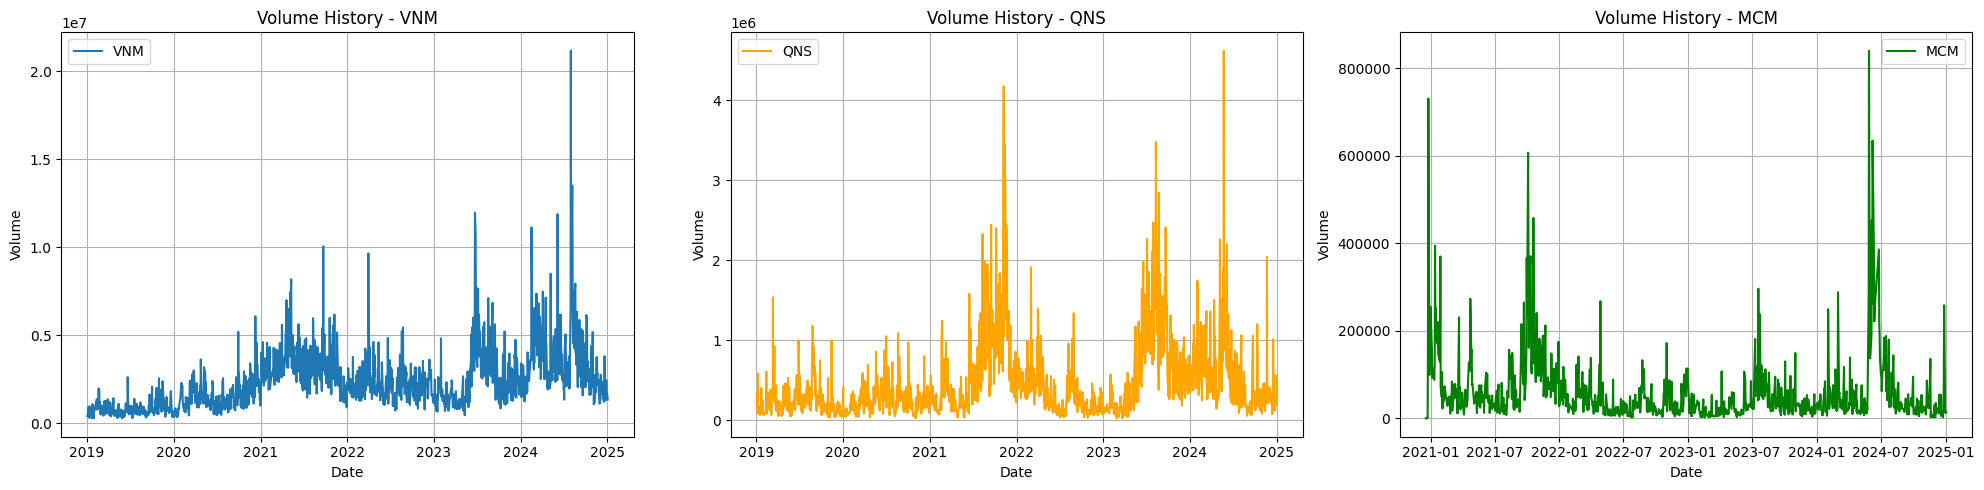

In [70]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Biểu đồ cho df_VNM
axs[0].plot(df_VNM.index, df_VNM['volume'], label='VNM')
axs[0].set_title("Volume History - VNM")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Volume')
axs[0].grid(True)
axs[0].legend()

# Biểu đồ cho df_QNS
axs[1].plot(df_QNS.index, df_QNS['volume'], label='QNS', color='orange')
axs[1].set_title("Volume History - QNS")
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Volume')
axs[1].grid(True)
axs[1].legend()

# Biểu đồ cho df_MCM
axs[2].plot(df_MCM.index, df_MCM['volume'], label='MCM', color='green')
axs[2].set_title("Volume History - MCM")
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Volume')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()


In [ ]:
import cufflinks as cf
import plotly.io as pio
cf.go_offline()
pio.renderers.default = 'colab'
milk_stocks.xs(key='close',axis=1,level='Stock Info').iplot(title='Giá đóng cửa ', xTitle='Năm', yTitle='Giá (K - VNĐ)')

/usr/local/lib/python3.10/dist-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



Dựa trên dữ liệu giá đóng cửa của ba cổ phiếu VNM, QNS, và MCM từ năm 2019 đến 2025, chúng ta có thể rút ra một số nhận xét và phân tích như sau:

**Giai đoạn 2019-2021**: Cổ phiếu các duy trì xu hướng tăng trưởng ổn định, có thể do doanh thu và lợi nhuận của công ty tăng lên nhờ mở rộng thị trường và phát triển sản phẩm mới.
 **Giai đoạn 2022-2023**: Giá cổ phiếu có xu hướng giảm nhẹ (QNS và MCM), có thể do các yếu tố ngoại cảnh như dịch bệnh COVID-19 ảnh hưởng tới ngành sữa và chuỗi cung ứng (thời gian giản cách).
**Giai đoạn 2024-2025**: Cổ phiếu của các công ty có xu hướng ổn định hơn, phản ánh sự phục hồi kinh tế và nỗ lực cải thiện kinh doanh của các công ty.


<a id='3.2'></a>
## 3.2 'Moving Average - MA'

Moving Average (MA) là một chỉ báo được sử dụng rộng rãi trong phân tích kỹ thuật, giúp làm mịn biến động giá bằng cách lọc ra "nhiễu" từ các dao động giá ngẫu nhiên. Nó là một chỉ báo xu hướng hoặc chỉ báo trễ, vì nó dựa trên giá trong quá khứ.